In [56]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.4 MB/s  0:00:01 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.8 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

In [109]:
df_sheets = pd.read_csv("sampleData/sheets.csv")
df_sheets_archive = pd.read_csv("sampleData/sheets_archive.csv")
df_sheets_archive_old = pd.read_csv("sampleData/sheets_archive_old.csv")
df_lark = pd.read_csv("sampleData/lark.csv")

print(len(df_sheets))
print(len(df_sheets_archive))
print(len(df_sheets_archive_old))
print(len(df_lark))

740
946
15878
120


In [132]:
for df in [df_sheets, df_sheets_archive, df_sheets_archive_old, df_lark]:
    df["Order Date"] = pd.to_datetime(df["Order Date"].astype(str), utc=True)


In [133]:
master_df = pd.concat(
    [df_sheets, df_sheets_archive, df_sheets_archive_old, df_lark],
    ignore_index=True
)
master_df["Order Date"] = pd.to_datetime(master_df["Order Date"])

In [134]:
master_df.columns

Index(['Order Date', 'SKU', 'Item', 'Variant', 'Quantity', 'Delivery Date',
       'Delivery Time'],
      dtype='object')

In [160]:
master_df.to_csv("sampleData/master_orders.csv", index=False)

# EDA

In [161]:
df = pd.read_csv("sampleData/master_orders.csv", parse_dates=["Order Date", "Delivery Date"])
df = df.sort_values("Order Date")

In [162]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17684 entries, 17563 to 1685
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Order Date     17506 non-null  datetime64[ns, UTC]
 1   SKU            16507 non-null  object             
 2   Item           17683 non-null  object             
 3   Variant        14338 non-null  object             
 4   Quantity       17663 non-null  float64            
 5   Delivery Date  11825 non-null  object             
 6   Delivery Time  11573 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 1.1+ MB
None


In [163]:
print(df.describe())

           Quantity
count  17663.000000
mean       1.304535
std        2.210588
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      200.000000


In [164]:
print(df.isna().sum())
print()
print(df["SKU"].nunique(), "unique SKUs")

Order Date        178
SKU              1177
Item                1
Variant          3346
Quantity           21
Delivery Date    5859
Delivery Time    6111
dtype: int64

1444 unique SKUs


In [165]:
print(df.groupby("SKU")["Quantity"].sum().sort_values(ascending=False).head(20))

SKU
SF50           5108.0
CU-1           1423.0
SC5             674.0
DR50            592.0
SC15            538.0
SR7/OKW         449.0
T80             442.0
SC18            401.0
SC4             369.0
CU              363.0
TV18            354.0
SR6/OKW         354.0
SC5/WAL         342.0
SR5/OKW         318.0
TV14            275.0
TV24/OKW1.6     253.0
SC4/WAL         235.0
TV13            199.0
TV24/OKW1.8     187.0
SC15/WAL        186.0
Name: Quantity, dtype: float64


## Top SKUs by order count

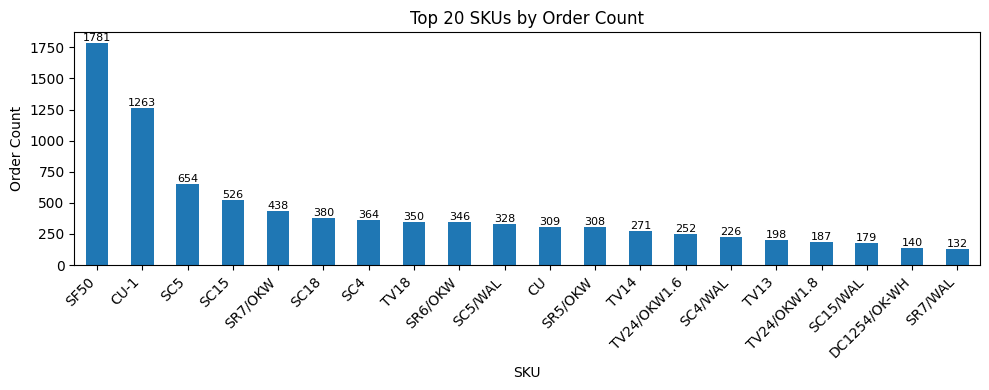

In [166]:
top_n = 20

counts = df["SKU"].dropna().value_counts().head(top_n)

ax = counts.plot(kind="bar", figsize=(10,4), title=f"Top {top_n} SKUs by Order Count")
ax.set_xlabel("SKU")
ax.set_ylabel("Order Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f"{int(height)}",
            ha="center", va="bottom", fontsize=8)

plt.show()

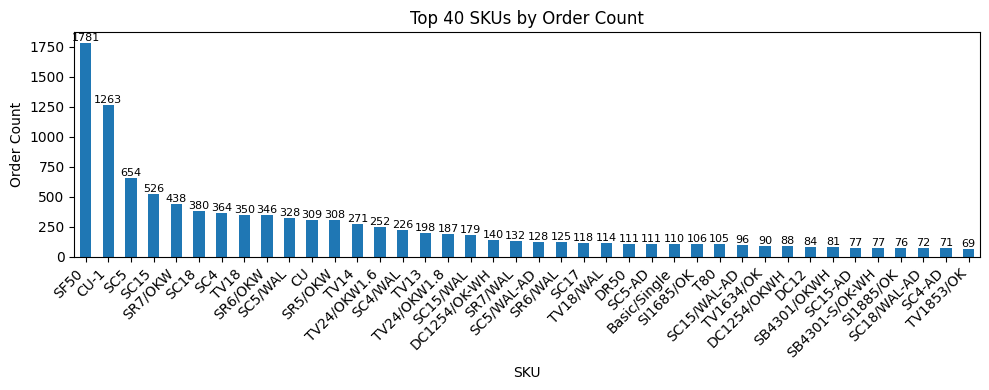

In [167]:
top_n = 40

counts = df["SKU"].dropna().value_counts().head(top_n)

ax = counts.plot(kind="bar", figsize=(10,4), title=f"Top {top_n} SKUs by Order Count")
ax.set_xlabel("SKU")
ax.set_ylabel("Order Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f"{int(height)}",
            ha="center", va="bottom", fontsize=8)

plt.show()

## Orders over time

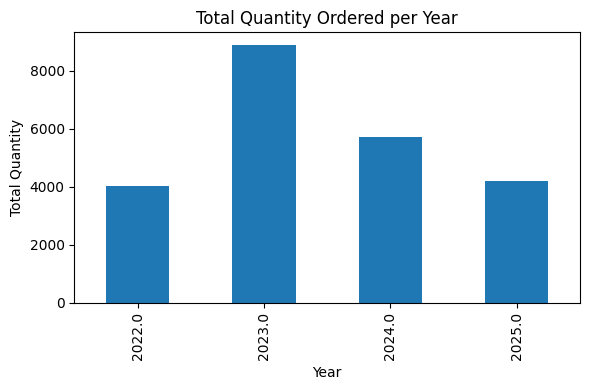

In [168]:
orders_per_year = df.groupby(df["Order Date"].dt.year)["Quantity"].sum()
orders_per_year.plot(kind="bar", title="Total Quantity Ordered per Year", figsize=(6,4))
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

/var/folders/tk/ptln5ljx66g1yqhg_dd36_200000gn/T/ipykernel_41774/2383841546.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders_per_month = df.groupby(df["Order Date"].dt.to_period("M")).size()


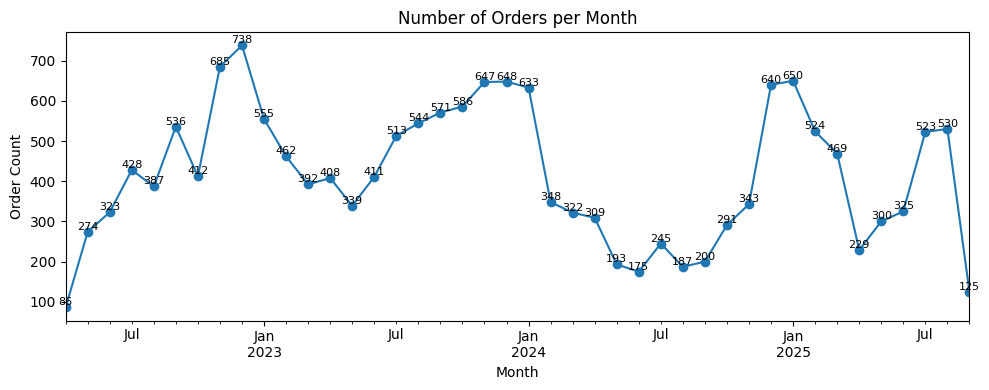

In [169]:
orders_per_month = df.groupby(df["Order Date"].dt.to_period("M")).size()
orders_per_month.index = orders_per_month.index.to_timestamp()

# plot
fig, ax = plt.subplots(figsize=(10, 4))
orders_per_month.plot(ax=ax, marker="o", title="Number of Orders per Month")

# add data labels
for x, y in zip(orders_per_month.index, orders_per_month.values):
    ax.text(x, y, str(int(y)), ha="center", va="bottom", fontsize=8)

plt.xlabel("Month")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

### Orders over time of top SKUs

In [170]:
top_skus = master_df["SKU"].value_counts().head(3).index

In [171]:
# filter top SKUs
df_top = master_df[master_df["SKU"].isin(top_skus)]

# group by week
weekly_orders = (
    df_top.groupby([pd.Grouper(key="Order Date", freq="W"), "SKU"])["Quantity"]
    .sum()
    .reset_index()
)

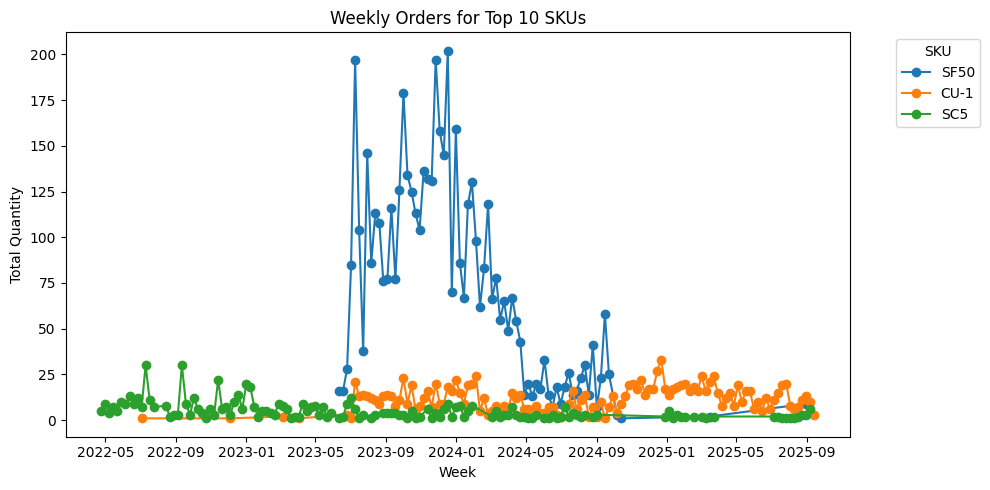

In [172]:
fig, ax = plt.subplots(figsize=(10,5))

for sku in top_skus:
    subset = weekly_orders[weekly_orders["SKU"] == sku]
    ax.plot(subset["Order Date"], subset["Quantity"], marker="o", label=sku)

ax.set_title("Weekly Orders for Top 10 SKUs")
ax.set_xlabel("Week")
ax.set_ylabel("Total Quantity")
ax.legend(title="SKU", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Determine revenue contributions of different SKUs to prioritise